# 20240119

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 모집단과 표본
#표본의 추출방법

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/통계/data/ch4_scores400.csv')
df.shape
scores = np.array(df.score)
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [3]:
np.random.choice([1,2,3],3,replace=False) # 중복방지

array([3, 1, 2])

In [4]:
data = np.array([1,2,3,4,5])
p = [0.1,0.2,0.4,0.2,0.1] # 각 데이터 포인트가 선택될 확률을 나타내는 리스트
sample = np.random.choice(data,size=10,replace=True,p=p) # p는 선택될 확률을 지정
print(sample)

[3 4 3 3 4 1 3 1 4 3]


In [6]:
np.random.seed(0)
sample = np.random.choice(scores,20) # default replace=True
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

In [7]:
sample.mean()

70.4

In [8]:
scores.mean()

69.53

In [9]:
for i in range(5):
  sample = np.random.choice(scores,20)
  print(sample)
  print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean(),'\n')

[56 55 79 91 86 79 83 55 85 76 81 57 77 99 61 57 81 73 59 59]
1번째 무작위 추출로 얻은 표본평균 72.45 

[80 50 85 86 85 59 72 58 31 60 56 64 49 88 66 63 63 47 67 45]
2번째 무작위 추출로 얻은 표본평균 63.7 

[31 55 77 61 54 57 72 46 52 76 92 63 63 80 94 70 76 61 80 61]
3번째 무작위 추출로 얻은 표본평균 66.05 

[47 60 65 86 65 74 76 60 85 78 73 70 68 86 58 74 67 67 83 92]
4번째 무작위 추출로 얻은 표본평균 71.7 

[54 73 92 81 87 56 96 57 93 67 90 54 90 75 46 80 63 57 78 94]
5번째 무작위 추출로 얻은 표본평균 74.15 



In [10]:
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

np.random.seed(1)
num_trial=100
sample = np.random.choice(dice,num_trial,p=prob)
sample

array([4, 6, 1, 4, 3, 2, 3, 4, 4, 5, 4, 5, 3, 6, 1, 5, 4, 5, 2, 3, 6, 6,
       4, 5, 6, 6, 2, 1, 3, 6, 2, 4, 6, 5, 5, 4, 5, 6, 1, 6, 6, 6, 3, 6,
       2, 4, 6, 4, 4, 2, 1, 5, 3, 3, 5, 2, 5, 3, 5, 5, 2, 4, 5, 4, 2, 5,
       5, 5, 6, 5, 6, 2, 2, 6, 4, 3, 6, 4, 6, 6, 6, 5, 6, 4, 3, 6, 4, 6,
       5, 5, 2, 6, 4, 5, 4, 3, 6, 5, 1, 5])

In [16]:
freq, _ = np.histogram(sample, bins=6,range=(1,7))
print(freq,'\n')
rdf = pd.DataFrame({'frequency':freq,
                    'relative frequency':freq/num_trial},
                   index=pd.Index(np.arange(1,7),name='dice'))
rdf

[ 6 12 12 20 24 26] 



,frequency,relative frequency
dice,,
1,6,0.06
2,12,0.12
3,12,0.12
4,20,0.20
5,24,0.24
6,26,0.26


[4 6 1 4 3 2 3 4 4 5 4 5 3 6 1 5 4 5 2 3 6 6 4 5 6 6 2 1 3 6 2 4 6 5 5 4 5
 6 1 6 6 6 3 6 2 4 6 4 4 2 1 5 3 3 5 2 5 3 5 5 2 4 5 4 2 5 5 5 6 5 6 2 2 6
 4 3 6 4 6 6 6 5 6 4 3 6 4 6 5 5 2 6 4 5 4 3 6 5 1 5]


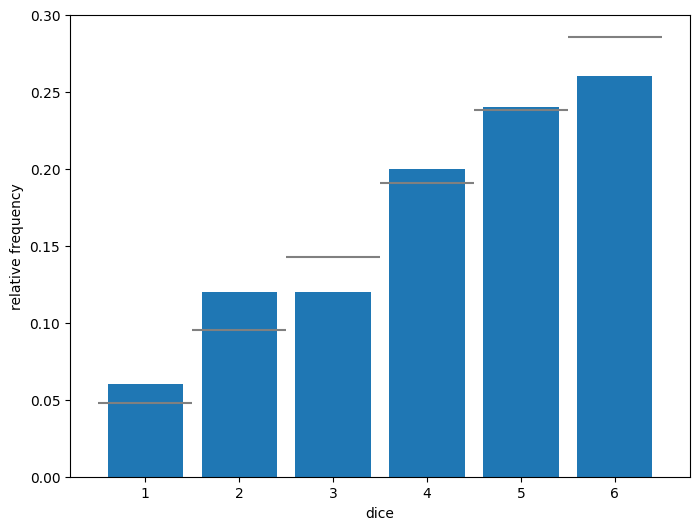

In [17]:
# 100번 시행하여 얻은 눈의 상대도수로부터 추측된 확률분포와 실제 확률분포 사이에는 차이 발생
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

np.linspace(1.5,6.5,6)
np.random.seed(1)
num_trial = 100

sample = np.random.choice(dice, num_trial, p=prob)
print(sample)
plt.figure(figsize=(8,6))
plt.hist(sample,bins=6,range=(1,7),density=True, rwidth=0.8)
# np.arange(1,7)에서 시작하여 np.arange(2,8)에서 끝나며, 각 빈을 범위로 합니다.
# 이 선들의 높이는 prob로 설정되며, 이는 주사위의 각 숫자를 굴릴 확률
plt.hlines(prob,np.arange(1,7), np.arange(2,8), colors='gray')

plt.xticks(np.linspace(1.5,6.5,6),np.arange(1,7)) # x, x_labels
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()

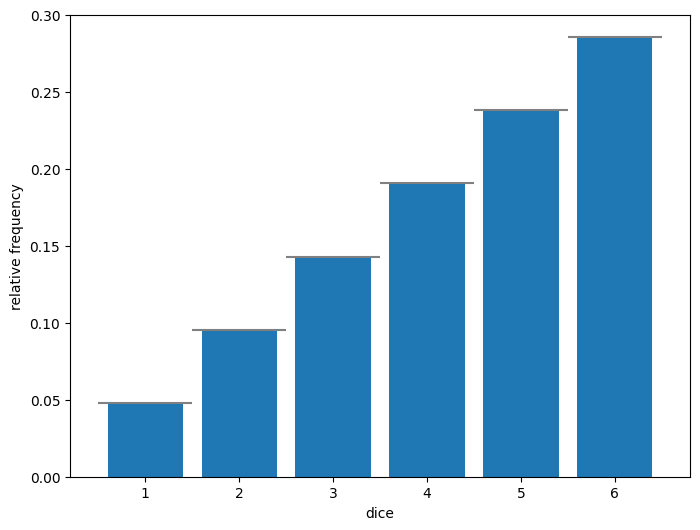

In [25]:
# 1000000번 시행하여 얻은 눈의 상대도수로부터 추측된 확률분포는 실제 확률분포로 근접
# 시행 횟수를 늘리면 상대도수는 확률분포로 수렴된다.
np.linspace(1.5,6.5,6)
np.random.seed(1)
num_trial=1000000
sample = np.random.choice(dice,num_trial, p=prob)

plt.figure(figsize=(8,6))
plt.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
plt.hlines(prob,np.arange(1,7), np.arange(2,8), colors='gray')

plt.xticks(np.linspace(1.5,6.5,6),np.arange(1,7)) # x, x_labels
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()

   score
0     76
1     55
2     80
3     80
4     74


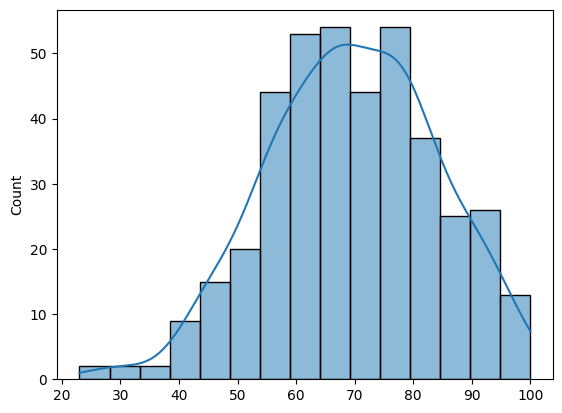

In [20]:
df = pd.read_csv('/content/drive/MyDrive/KITA_1026/m3_분석라이브러리/통계/data/ch4_scores400.csv')
print(df.head())
df.shape
scores = np.array(df.score)
sns.histplot(scores,kde=True)
plt.show()

In [21]:
scores.shape

(400,)

In [22]:
scores.mean()

69.53

10000


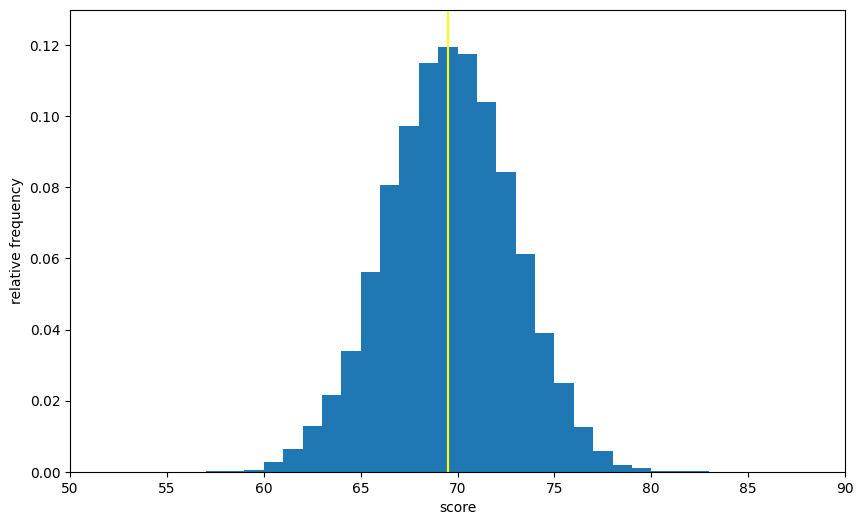

In [23]:
# 표본평균은 모평균을 중심으로 분포하는 것을 확인
# 무작위 추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 된다.
sample_means = [np.random.choice(scores,20).mean() for _ in range(10000)]
print(len(sample_means))

fig = plt.figure(figsize=(10,6))
plt.hist(sample_means,bins=100,range=(0,100),density=True)
# 모평균을 세로선으로 표시
plt.vlines(np.mean(scores),0,1,'yellow')
plt.axis([50,90,0,0.13])
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.show()

### 표본 분포 및 중심극한정리

- 인구 평균: 전체 모집단에서 가능한 모든 값의 평균. 많은 경우, 특히 대규모 인구의 경우 인구의 모든 구성원을 측정할 수 없기 때문에 계산이 비실용적이거나 불가능.
- 표본 평균: 모집단의 하위 집합인 표본 값의 평균. 샘플링의 핵심 아이디어는 모집단의 대표 하위 집합을 선택하여 전체 모집단의 속성을 추정할 수 있다.
- 표본 평균의 표본 분포: 표본을 채취하여 평균을 계산하면 표본 평균을 얻는다. 반복적으로 많은 표본을 추출하여 평균을 계산하면 이러한 표본 평균의 분포를 표본 평균의 표본 분포라고 한다.
- **중심 극한 정리(CLT)**: 이 정리는 통계에서 매우 중요. 이는 모집단의 분포에 관계없이 표본 크기가 충분히 크면 표본 평균의 분포가 정규 분포에 가까워진다는 것을 나타낸다. 중요한 것은 이 정규 분포의 평균이 모집단 평균과 같고 표준 편차(표준 오차라고도 함)가 표본 크기가 증가함에 따라 감소한다는 것이다.
모집단 평균 추정: 표본의 평균을 계산하여 모집단 평균을 추정할 수 있다. 이 추정의 정확도는 표본 크기가 크고 표본이 많을수록 향상된다.

- 정규 분포를 따르지 않는 인구(예: 도시의 성인 남성 키)가 있다고 상상해 보자. CLT에 따르면, 이 모집단에서 충분히 큰 무작위 표본을 추출하여 평균을 계산하면 이러한 평균의 분포는 대략 정규 분포가 된다. 이 정규 분포는 실제 모집단 평균을 중심으로 하며 표본 크기가 커질수록 분포가 좁아진다.

Q. 작은 마을에 사는 사람들의 연령과 같은 간단한 인구를 고려하고 표본 평균이 어떻게 분포하는지를 아래 사항을 참조하여 추정하세요.
- 평균 연령이 40세이고 표준편차가 15인 정규분포를 따르는 데이터 10000개로 모집단 가상 인구(population_ages)를 만든다.
- 그런 다음 이 모집단에서 샘플 사이즈 30인 표본을 1000개 추출하여 평균을 계산한다.
- 마지막으로, 이러한 표본 평균을 플롯하여 모집단 평균 주위에 어떻게 분포되어 있는지 보여준다.

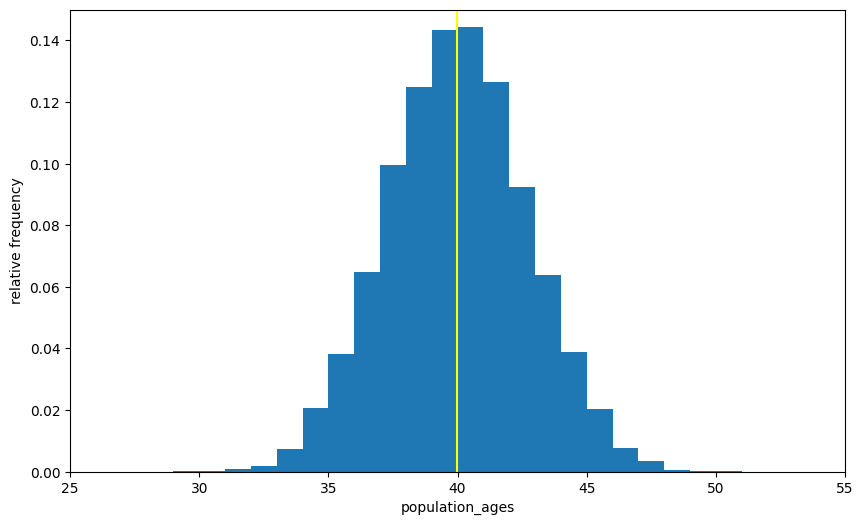

In [40]:
population_ages = np.random.normal(40,15,10000)

# matrix = np.zeros((30,1000))

# for s in range(1000):
#   matrix[:,s] = np.random.choice(population_ages, 30)

# mean_sample = np.mean(matrix,axis=0)
# print("1000개의 표본에 대한 평균:",mean_sample)

mean_sample = [np.random.choice(population_ages,30).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
plt.hist(mean_sample,bins=100,range=(0,100),density=True)
# 모평균을 세로선으로 표시
plt.vlines(np.mean(population_ages),0,1,'yellow')
plt.axis([25,55,0,0.15])
plt.xlabel('population_ages')
plt.ylabel('relative frequency')
plt.show()

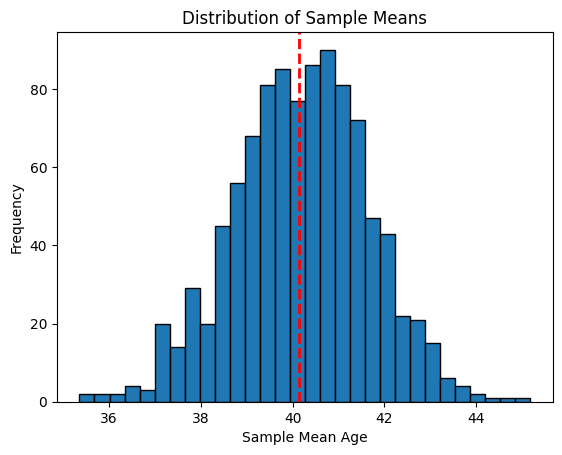

In [36]:
# Creating a population (for example, ages of people)
population_ages = np.random.normal(40,15,10000)

# Calculating the population mean
population_mean = np.mean(population_ages)

# Taking multiple samples and calculating their means
sample_means = []
n_samples = 1000
sample_size = 100

for _ in range(n_samples):
  sample = np.random.choice(population_ages, sample_size)
  sample_means.append(np.mean(sample))

# Plotting the distribution of smple means
plt.hist(sample_means, bins=30, edgecolor='black')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Sample Mean Age')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
plt.show()

## 확률
확률론은 불확실성이 존재하는 상황에서 결과의 가능성을 수학적으로 모델링하는 분야입니다. 이를 위해 몇 가지 중요한 개념이 필요합니다. 이 중요한 개념들은 다음과 같습니다:

- 실험과 표본 공간: 확률론에서는 특정한 조건에서 일어나는 사건을 실험이라고 하며, 실험에서 가능한 모든 결과의 집합을 표본 공간이라고 합니다.

- 사건과 확률: 사건은 표본 공간의 부분집합으로, 일어날 가능성이 있는 결과의 집합을 의미합니다. 확률은 특정한 사건이 일어날 가능성을 나타내는 값으로, 0과 1 사이의 값입니다.

- 조건부 확률: 조건부 확률은 특정한 사건이 일어났을 때, 다른 사건이 일어날 확률을 의미합니다. 조건부 확률은 주어진 사건이 일어난 경우에만 적용되며, 이전 확률과는 다른 개념입니다.

- 독립성: 두 사건이 독립적이라는 것은, 하나의 사건이 일어나는 것이 다른 사건의 발생 가능성에 영향을 미치지 않는다는 것을 의미합니다. 이러한 경우, 두 사건의 결합 확률은 두 확률의 곱과 같습니다.

- 확률분포: 확률분포는 가능한 모든 결과에 대해 각각의 결과가 일어날 확률을 나타내는 함수입니다. 대표적인 예로 이항분포, 정규분포 등이 있습니다.

- 기대값: 기대값은 확률분포와 관련되어, 각 결과의 확률과 그 결과의 가치를 곱한 값을 모두 더한 것입니다. 즉, 평균값과 유사한 개념입니다.


In [42]:
dice_sides = [1,2,3,4,5,6]
probability = 1/6

# 기대값 계산
expected_value = sum(side * probability for side in dice_sides)

print(f"주사위 던지기의 기대값은 {expected_value}입니다.")

주사위 던지기의 기대값은 3.5입니다.


### 확률의 빈도주의 관점과 베이지안 관점
확률의 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다.

- 빈도주의 관점에서는 확률을 "반복되는 실험에서 어떤 사건이 일어날 빈도"로 정의합니다. 즉, 많은 반복을 통해 어떤 사건이 발생하는 비율을 계산하는 것입니다. 이 관점에서는 데이터가 수집될 때마다 확률값이 달라지지 않는다고 가정하며, 샘플 크기가 커질수록 이론적인 확률 값과 가까워진다고 봅니다.

- 반면에 베이지안 관점에서는 확률을 "사건이 일어날 가능성"으로 정의합니다. 이 관점에서는 데이터를 수집하기 전에 이미 어떤 사전 지식이 있다는 가정하에 데이터를 수집하고, 그에 따라 사후 확률을 갱신합니다. 이는 사전 지식과 데이터를 통해 모델 파라미터의 확률 분포를 추정하고, 이를 통해 불확실성을 줄이는 것입니다.

- 이러한 차이 때문에 빈도주의 관점에서는 확률을 정확하게 계산하고자 반복 실험을 수행하며, 이론적인 확률값에 근접하도록 데이터 크기를 늘립니다. 반면에 베이지안 관점에서는 사전 지식을 가정하고, 그에 따라 데이터를 수집하며, 사전 지식과 데이터를 결합하여 모델의 불확실성을 추정합니다.

- 결론적으로, 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다. 빈도주의 관점은 확률을 실험에서 어떤 사건이 일어날 빈도로 이해하며, 베이지안 관점은 확률을 어떤 사건이 일어날 가능성으로 이해합니다. 이러한 차이로 인해 빈도주의와 베이지안 방법은 다양한 문제 해결에 사용됩니다. 예를 들어, 빈도주의 방법은 통계적 추론에 사용되며, 베이지안 방법은 패턴 인식, 머신러닝, 자연어 처리 분야 등에서 사용됩니다.

#### 빈도주의 관점
빈도주의 관점은 확률을 "반복되는 실험에서 어떤 사건이 일어날 빈도"로 이해하는 것입니다. 이를 이해하기 위해서는 간단한 예시를 들어보겠습니다.

- 예를 들어, 동전을 던져서 앞면이 나올 확률이 얼마나 되는지 알아보려고 한다고 가정해봅시다. 이 경우, 동전을 반복적으로 던져서 앞면이 나올 확률을 계산하는 것이 빈도주의 관점입니다.

- 100번의 실험을 수행해서 앞면이 60번 나왔다면, 앞면이 나올 확률은 0.6, 즉 60%입니다. 이처럼 빈도주의 관점에서는 반복적인 실험을 통해 얻은 데이터를 바탕으로 확률을 계산합니다.

- 이와 같은 방법으로, 빈도주의 관점은 대규모 데이터를 바탕으로 통계적 추론을 수행하는 분야에서 많이 사용됩니다. 예를 들어, 의학 연구에서는 수많은 환자 데이터를 바탕으로 질병 발생 확률을 계산하고, 이를 바탕으로 예방 방법을 제시합니다. 또한, 마케팅 연구에서는 대규모 데이터를 바탕으로 소비자의 구매 확률을 계산하고, 이를 바탕으로 마케팅 전략을 수립합니다.

- 즉, 빈도주의 관점에서는 반복적인 실험을 통해 데이터를 모으고, 이를 바탕으로 확률을 계산합니다. 이를 통해 대규모 데이터에서 일어날 가능성을 추정하고, 이를 바탕으로 데이터 분석 및 예측을 수행합니다.

In [45]:
import numpy as np

# 주사위 던지기 횟수
n_throws = 10000

# 주사위 던지기 시뮬레이션 (1부터 6까지의 숫자 무작위 선택)
throws = np.random.choice([1,2,3,4,5,6], n_throws)

# '6'이 나온 횟수 세기
six_count = np.sum(throws == 6) # 이렇게 하면 6이 나온 빈도수

# '6'이 나올 확률 계산
probability_of_six = six_count / n_throws

print(f"주사위를 {n_throws}번 던진 후, '6'이 나올 확률은 {probability_of_six:.2f}입니다.")

주사위를 10000번 던진 후, '6'이 나올 확률은 0.17입니다.


#### 베이지안 관점
베이지안 관점은 확률을 "사건이 일어날 가능성"으로 이해하는 것입니다. 이를 이해하기 위해서는 간단한 예시를 들어보겠습니다.

- 예를 들어, 암 환자 진단 문제를 생각해봅시다. 어떤 환자가 암에 걸렸을 때, 병원에서 검사를 통해 양성 판정이 나왔다고 가정해봅시다. 이 때, 베이지안 관점에서는 이 결과가 실제로 환자가 암에 걸렸음을 의미하는가에 대한 확률을 계산합니다.

- 베이지안 관점에서는 이 확률을 "사전 확률"이라고 부릅니다. 즉, 검사를 통해 양성 판정이 나오기 전에는 이 환자가 암에 걸렸을 확률을 이미 가정하고 있었다는 것입니다. 예를 들어, 이전의 암 환자들의 데이터를 분석하여, 이 환자가 암에 걸렸을 확률을 0.1, 즉 10%로 가정하였다고 합시다.

- 그리고, 이제 검사를 통해 양성 판정이 나왔다고 가정합니다. 이 때, 검사 결과가 양성일 때 암에 걸렸을 확률을 계산하는 것이 베이지안 관점입니다. 이를 "사후 확률"이라고 부르며, 사전 확률과 검사 결과를 고려하여 계산됩니다.

- 예를 들어, 이전의 암 환자들의 데이터에서 암에 걸린 환자 중 80%가 양성 판정을 받았다고 가정합니다. 이러한 정보를 바탕으로, 이 환자가 암에 걸렸을 사후 확률은 다음과 같이 계산됩니다.

베이즈 정리의 공식

$$ P(A \mid B) = \frac{P(B \mid A) \times P(A)}{P(B)} $$

  - P(A) 사전 확률: 10%
  - P(B|A) 우도 likelihood(검사 결과가 양성일 확률): 80%
  - P(B) 전체에서 양성 반응을 보일 확률:이는 질병이 있는 사람의 양성 반응 확률과 질병이 없는 사람의 양성 반응 확률을 합한 값
  - P(A|B) 사후 확률: (10% x 80%) / (10% x 80% + 90% x 20%) = 30.8%

즉, 이 환자가 검사 결과가 양성인 경우에는 암에 걸렸을 확률이 30.8%입니다.

이와 같이, 베이지안 관점에서는 사전 지식을 가정하고, 그에 따라 데이터를 수집하며, 사전 지식과 데이터를 결합하여 모델의 불확실성을 추정합니다. 이를 통해 데이터의 불확실성을 고려하여 예측과 의사결정을 수행합니다.

##### Q3_0119. 아래 문제를 수행하세요.

상황 정보

- 특정 질병을 가진 사람이 테스트에서 양성 반응을 보일 확률(즉, 테스트의 민감도)이 99%라고 합니다.
- 그리고 이 질병이 없는 사람이 음성 반응을 보일 확률(즉, 테스트의 특이성)도 99%라고 가정합니다.
- 이 질병의 전체 인구에 대한 유병률이 1%라고 가정해 봅시다.

이제 한 사람이 이 테스트에서 양성 반응을 보였을 때, 그 사람이 실제로 이 질병을 가지고 있을 확률은 얼마일까요?

In [54]:
# A = 테스트 양성
# B = 유병
# 문제 P(B|A)
# 공식 P(B|A) = P(A|B) x P(B) / P(A)
# P(A|B) 즉 질병은 가지고 있는데, 테스트 양성일 확률. 즉 민감도 = 99%
# P(B) 즉 유병률 = 1%
# P(A) 즉 테스트 양성 확률. 두가지 케이스가 있다. 즉 전체 인구에서 질병이 있는 사람의 양성 확률 (1% * 99%) + 전체 인구에서 질병이 없는 사람의 양성 확률 (99% * 1%)

prob_b_given_a = (0.99*0.01) / (0.01*0.99 + 0.99*0.01)
print("테스트 양성을 보인 사람이 실제 질병을 가지고 있을 확률:",prob_b_given_a)

테스트 양성을 보인 사람이 실제 질병을 가지고 있을 확률: 0.5


## 추측통계
확률을 사용하여 모집단의 통계적 성질을 추측하는 기법

[모집단 분포와 표본분포]  

- 모집단: 어떤 통계적 실험의 대상이 되는 모든 대상물. ex. 대한민국 모든 남성의 키 데이터, 2018 수능점수 데이터
- 모집단 분포: 모집단은 데이터 집단이므로 어떠한 분포를 이루며 이 데이터가 이루는 확률 분포가 모집단 분포
- 모수: 모집단의 특성을 나타내는 수치로 모평균,모분산,모표준편차,모비율,모상관관계 등  
  수능점수 전체데이터를 알고 싶은 것이 아니라 전체 수능점수 평균, 표준편차를 알고 싶어한다.
  수능점수와 달리 일반적으로 대부분의 모집단 분포는 완전하게 알려진 것이 없으며 전수조사는 경제적, 공간적, 시간적 제약으로 인해 거의 불가능
- 표본: 모집단의 모수(특성)을 알기 위하여 표본을 추출해서 모집단의 모수를 추정
- 확률표본:  모집단을 구성하는 모든 구성원이 표본으로 뽑힐 확률을 동일하게 하여 추출한 표본. Random이란 무작위라는 의미로, 어떠한 의도를 가지지 않는다는 것을 의미하며, 모든 구성원이 뽑힐 확률이 동일하다는 개념.
- 통계량: 확률표본의 특성을 설명하는 값으로 표본평균, 표본분산, 표본표준편차, 표본비율, 표본상관관계 등  
  모수는 모집단이 변하지 않기 때문에 그 값이 변하지 않으나 통계량은 표본을 어떻게 추출하느냐에 따라서 그 값이 다르게 나타난다.
- 확률변수: 무작위 실험을 했을 때 특정 확률로 발생하는 각각의 결과를 수치값으로 표현한 변수. 동전의 앞과 뒤
- 확률분포: 확률변수 X의 모든 값과 그 에 대응하는 확률값들의 분포. 동전의 앞 0.5, 뒤 0.5
- 무작위로 표본 30개씩 반복해서 100번 추출하면 100번 추출한 표본 30개의 평균값들을 100개 구할 수 있다. 추출된 표본들의 각 평균값들에 대한 발생 분포를 그려보면 특정 확률변수에 대응하는 확률을 가진 확률 분포를 그릴 수 있다. 이것을 통계량의 확률분포라고 할 수 있고 이를 표본분포라고 부른다.
- 통계량이 확률 변수라는 의미: 확률변수의 확률분포가 수학적으로 설명가능한 분포(예, 정규분포)를 따른다고 하면 특정 확률변수와 확률함수를 알고 있다면 특정 사건이 일어날 확률을 계산할 수 있으며 더 나아가 모수와 통계량의 관계를 알고 있다면 그것을 통해 모수에 대한 통계적인 추정을 할 수 있다. 즉 통계량의 확률 함수 또는 표본 분포를 안다고 가정하면 이를 이용해 모수를 추정할 수 있다.

[표본통계량 성질]

- 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.
- 샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐. 샘플사이즈를 크게 하면 흩어짐이 적은 신뢰할 수 있는 표본평균을 얻을 수 있다.
- 표준오차는이론상 표본평균의 표준편차 크기인데 샘플사이즈가 커지면 표준오차는 작아짐
- 모분산은 0.64, 표본분산의 평균값은 0.575로 분산이 과소평가되어짐 -> 불편분산을 사용, 편향을 제거(ddof =1)
- 샘플사이즈가 커질수록 불편분산은 모분산(0.64)에 가까워짐
- 불편성 : 추정량의 기댓값이 진짜 모수(모집단의 파라미터)가 되는 특성. 편향이 없는 추정량
- 일치성 : 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성
- 표본평균과 불편분산은 둘다 불편성을 가지고 있다고 할 수 있다.
- 샘플사이즈를 크게 하면 표본평균은 모평균에 가까워지고 불편분산은 모분산에 가까워지므로 일치성을 가짐
- 큰수의 법칙 : 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 방법을 표현한 법칙
- 중심극한정리 : 모집단분포가 무엇이든지간에 샘플사이즈가 커지면 표본 평균들이 이루는 분포가 모집단의 평균μ, 표준편차σ/sqrt(n)인 정규분포에 가까워진다는 정리  

In [55]:
# 평균 4, 표준편차 0.8이 정규분포에서 10개의 샘플 추출

from scipy import stats
population = stats.norm(loc=4,scale=0.8)
population.rvs(size=10)

array([6.03624778, 3.85985291, 3.48838422, 4.35538074, 4.249079  ,
       3.50027626, 4.65717384, 4.91258821, 3.08425967, 3.47447209])

In [56]:
sample_mean_array = np.zeros(10000)
print(sample_mean_array[:10])
for i in range(10000):
  sample_mean_array[i] = population.rvs(size=10).mean()
sample_mean_array[:10]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([4.09814894, 4.22546262, 4.28181214, 4.13850157, 4.043363  ,
       3.6075198 , 3.64242174, 4.01799236, 4.11129255, 4.4260349 ])

In [57]:
# 표본평균의 평균
sample_mean_array.mean().round(2)

4.0

In [58]:
# 표본평균의 표준편차
sample_mean_array.std(ddof=1).round(2)

0.26

<Axes: ylabel='Count'>

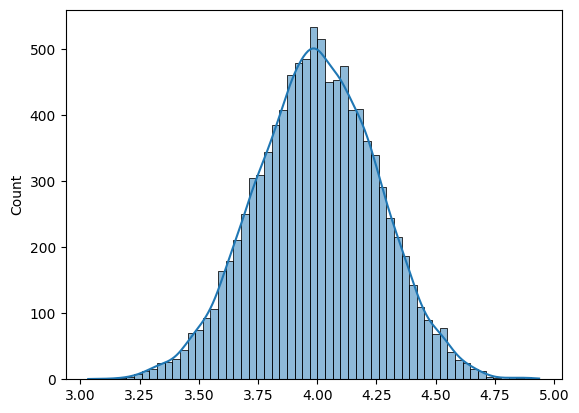

In [59]:
import seaborn as sns
sns.histplot(sample_mean_array,kde=True)

In [60]:
# 샘플사이즈 변화
size_array = np.arange(10,100100,100)
size_array[:10]

array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])

In [61]:
sample_mean_array_size = np.zeros(len(size_array))
len(sample_mean_array_size)

1001

In [62]:
# 샘플사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션
np.random.seed(1)
for i in range(0,len(size_array)):
  sample = population.rvs(size=size_array[i])
  sample_mean_array_size[i] = np.mean(sample)
sample_mean_array_size[990:]

array([3.99954467, 4.00115947, 4.00311652, 3.99975072, 3.99989178,
       3.99777706, 3.99881193, 3.99936965, 3.99778023, 3.99851887,
       3.99990764])

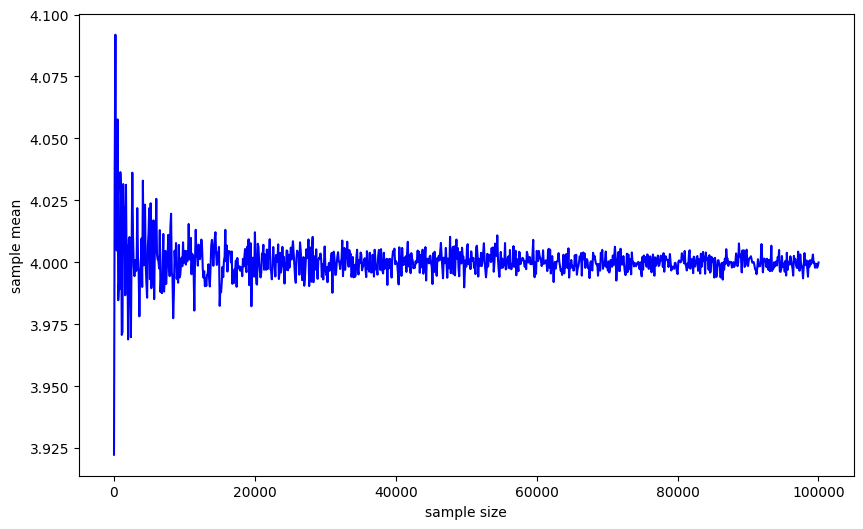

In [63]:
plt.figure(figsize=(10,6))
plt.plot(size_array, sample_mean_array_size, color='b')
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()

##### Q4_0119. 사용자 함수를 사용하여 샘플사이즈가 10,20,30이고 샘플갯수가 각각 10000개인 3개의 데이터프레임을 생성하여 결합한 후 바이올린 플롯을 그리고 탐색하여 인사이트를 기술하세요.

<Axes: >

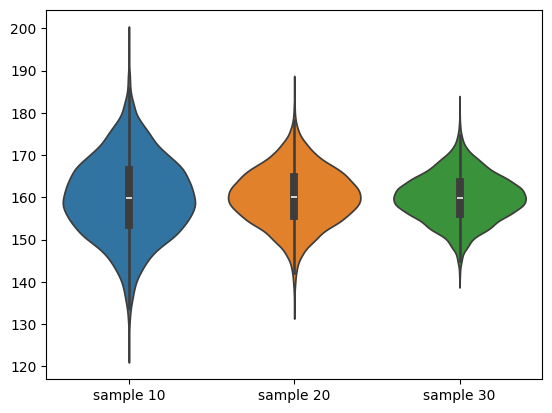

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns

# 주어진 모집단, sample_size, sample_number 대로 sample 집단을 만들고 만들어진 sample 집단의 각 평균을 array로 리턴하는 사용자 함수
def sample_mean_generator(sample_size, sample_number,population):
  sample_matrix = np.zeros((sample_size,sample_number))

  for s in range(sample_number):
    sample_matrix[:,s] = np.random.choice(population, sample_size)
    sample_mean = np.mean(sample_matrix,axis=0)
  return sample_mean

# 모집단 생성
population_ex = np.random.normal(160,30,10000)

# 사용자 함수 사용하여 샘플사이즈가 10,20,30이고 샘플갯수가 각각 10000개의 sample 집단 평균 생성
sample_10 = sample_mean_generator(10,10000,population_ex)
sample_20 = sample_mean_generator(20,10000,population_ex)
sample_30 = sample_mean_generator(30,10000,population_ex)

# 데이터 프레임 결합
df_4 = pd.DataFrame(np.column_stack((sample_10,sample_20,sample_30)),columns=["sample 10", "sample 20", "sample 30"])
df_4.head()

# 바이올린 플롯
sns.violinplot(df_4)

##### Q5_0119. 어떤 질병 A가 인구 중 0.5%에서 발생합니다. 질병을 진단하는 테스트는 99%의 민감도와 95%의 특이도를 가지는 상황에서 한 사람이 테스트에서 양성 결과를 받았다. 이 사람이 실제로 질병 A를 가지고 있을 확률은 얼마입니까?
- 특이도는 '질병이 없는 사람이 음성 반응을 보일 확률'로 정의

In [65]:
# A = 질병 사건
# B = 테스트 양성 사건
# P(A|B) = ?
# P(A|B) = P(B|A)*P(A)/P(B)
# P(B|A) 질병 있는 사람이 테스트 양성일 확율 = 민감도 99%
# P(A) = 질병이 있을 확율 0.5%
# P(B) = 테스트 양성일 확율. 0.5%*99% + 99.5%*5%
prob_a_given_b = 0.99 * 0.005 / (0.005*0.99 + 0.995*0.05)
print("양성 받은 한 사람이 실제로 질병A를 가지고 있을 확률 P(A|B):",prob_a_given_b)

양성 받은 한 사람이 실제로 질병A를 가지고 있을 확률 P(A|B): 0.09049360146252285


##### Q6_0119. 어떤 질병 B가 인구 중 2%에서 발생한다. 이 질병을 진단하는 또 다른 테스트는 90%의 민감도와 85%의 특이도를 가지는 상황에서 한 사람이 이 테스트에서 음성 결과를 받았다. 이 사람이 실제로 질병 B를 가지고 있지 않을 확률은 얼마입니까?

In [66]:
# B = B질병을 가지고 있지 않는 사건
# A = 테스트 음성
# P(B|A) = ?
# P(B|A) = P(A|B) * P(B) / P(A)
# P(A|B) 즉 질병을 가지고 있지 않은 사람이 테스트 음성인 확률 즉 특이도: 85%
# P(B) 즉 B 질병을 가지고 있지 않을 확률: 98%
# P(A) 즉 테스트 음성일 확율. 즉 질병이 있는 사람이 음성을 받을 확률 + 질병이 없는 사람이 음성을 받을 확률
# P(A) = 0.02 * 0.1 + 0.98 * 0.85

prob_b_given_a = 0.85 * 0.98 / (0.02 * 0.1 + 0.98 * 0.85)
print("음성 받은 한 사람이 실제로 질병 B를 가지고 있지 않을 확률 P(B|A):", prob_b_given_a)

음성 받은 한 사람이 실제로 질병 B를 가지고 있지 않을 확률 P(B|A): 0.9976047904191617
